Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [2]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [3]:
#Your linear model from HW2
def model(x,w):
    y_predicted = np.dot(x.T,w[1:])+w[0]  
    return y_predicted


#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    # calculate sigmoid
    sig = sigmoid(model(x,w))
    
    # y=0 points cost
    y_0 = np.argwhere(y == 0)[:,1]
    cost = -np.sum(np.log(1 - sig[y_0]))
    
    # y=1 points cost
    y_1 = np.argwhere(y==1)[:,1]
    cost -= np.sum(np.log(sig[y_1]))
    
    # return cross entropy
    return cost/y.size

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

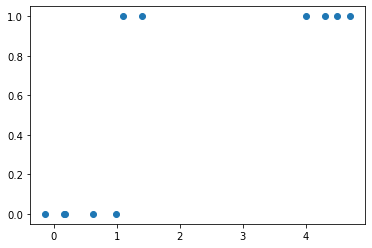

In [4]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 
plt.scatter(x,y)

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [5]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  
    weight_history = [w]
    starting_cost = g(w,x,y)
    cost_history = [starting_cost]
    for i in range(1,max_its):
        # define a new and previous value using a step
        step = gradient(w,x,y)
        w = w - alpha*step
        curr_cost = g(w,x,y)
        weight_history.append(w)
        cost_history.append(curr_cost)
    return weight_history,cost_history

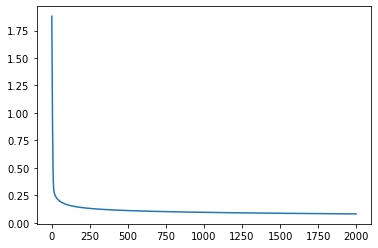

In [6]:
##Call the gradient_descent function here
w = np.array([3.0,3.0])
grad_desc = gradient_descent(cross_entropy, 1, 2000, w, x, y)
##Plot the cost history here
plt.plot(grad_desc[1])

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [7]:
def logistic_regression(learned_w,x):
    y = model(x,learned_w)
    positive_class_prob = sigmoid(y)
    return positive_class_prob

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


[[-0.12945952  0.17126776  0.18900687  0.62817746  0.98698383  1.1
   1.4         4.          4.3         4.5         4.7       ]]


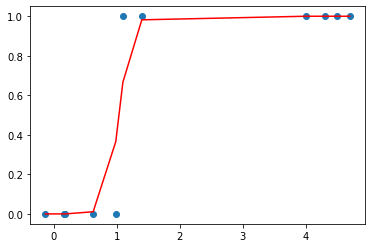

In [8]:
s = np.linspace(np.min(x),np.max(x))
print(x)
s_new = np.array((s[0]))
y_pred = logistic_regression(grad_desc[0][-1], x)
plt.scatter(x,y)
plt.plot(x[0],y_pred,"red")

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [9]:
def logistic_regression_modified(learned_w,x, threshold):
    # linearly combine
    y = model(x,learned_w)
    # calculate class prob
    positive_class_prob = sigmoid(y)
    class_label = []
    for prob in positive_class_prob:
        if prob >= threshold: class_label.append(1)
        if prob < threshold: class_label.append(0)
    return np.array(class_label)

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [10]:
from sklearn.metrics import confusion_matrix

def evaluate(y_actual,y_pred):
    # confusion matrix
    confusion_matrix_output = confusion_matrix(y_actual,y_pred, labels=[1,0])
    print('Confusion matrix : \n',confusion_matrix_output)
    
    tp = confusion_matrix_output[1][1]
    tn = confusion_matrix_output[0][0]
    fp = confusion_matrix_output[0][1]
    fn = confusion_matrix_output[1][0]
    
    # false positives and negatives
    false_positive = fp/(fp+tn)
    false_negative = fn/(fn+tp)
    
    # true positives and negatives
    true_positive = tp/(tp+fn)
    true_negative = tn/(tn+fp)
    
    # Overall accuracy
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print("The evaluation: ")
    # return all 
    return false_positive, false_negative, true_positive, true_negative, accuracy




# get y predicted
y_pred = logistic_regression_modified(grad_desc[0][-1], x, 0.5)

# get y as an array of the correct types
y_actual_list = []
for val in y[0]:
    y_actual_list.append(int(val))
y_actual = np.array(y_actual_list)

print("y_pred:")
print(y_pred)
print("y_actual:")
print(y_actual)
print("length of pred")
print(len(y_pred))
print("length of actual")
print(len(y_actual))


# plug in and evaluate
print(evaluate(y_actual,y_pred))

## training and testing on the same set!!


y_pred:
[0 0 0 0 0 1 1 1 1 1 1]
y_actual:
[0 0 0 0 0 1 1 1 1 1 1]
length of pred
11
length of actual
11
Confusion matrix : 
 [[6 0]
 [0 5]]
The evaluation: 
(0.0, 0.0, 1.0, 1.0, 1.0)


Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [27]:
def new_sigmoid(x):
    sig_val = (2/(1 + np.exp(-x)))-1
    return sig_val

def perceptron_cost(w,x,y):
    y_predicted = model(x,w)
    cost = 0
    for i in range(y_predicted.size):
        cost += np.log(1 + np.exp(-y[0][i]*y_predicted[i]))
    
    cost /= y_predicted.size
    return cost

def perceptron_cost2(w,x,y):
    # get new y values
    y[y==0] = -1
    
    # calculate sigmoid
    sig = new_sigmoid(model(x,w))
    
    # y=-1 points cost
    y_neg = np.argwhere(y == -1)[:,1]
    cost = -np.sum(np.log(1 - sig[y_neg]))
    
    # y=1 points cost
    y_pos = np.argwhere(y==1)[:,1]
    cost -= np.sum(np.log(sig[y_pos]))
    
    # return cross entropy
    return cost/y.size

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?
This appears to be a better fit than the cross entropy cost because the overall loss is better and it is able to produce a better fit!

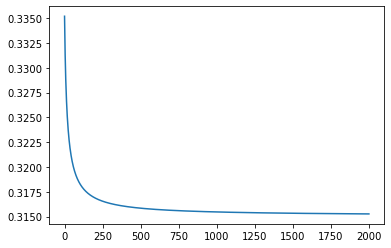

In [29]:
##Call the gradient_descent function here

# reload the data because it got messed up somehow
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 
w_10 = np.array([1.0,1.0])
percep_gd = gradient_descent(perceptron_cost,1.0,2000,w_10,x,y)

##Plot the cost history here
plt.plot(percep_gd[1])

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [13]:
col_list = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart = pd.read_csv("heart.csv", usecols=col_list)

Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [14]:
X = heart[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
y = heart["target"]

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [16]:
# instantiate the model
logreg = LogisticRegression(max_iter=1000)

# fit the model training
clf = logreg.fit(X_train,y_train)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [17]:
prob = clf.predict_proba(X_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [18]:
class_1_prob = []
for tuple in prob:
    class_1_prob.append(tuple[1])

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

In [19]:
##Your code here

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [20]:
##Your code here